In [79]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [88]:
df = pd.read_excel("Insper.xlsx")

df = df \
    [lambda ldf: ldf['Finished'] == 1] \
    .reset_index(drop=True) \
    [lambda ldf: ldf.applymap(lambda x: 1 if x=='x' else 0).sum(axis=1) == 0] \
    .reset_index(drop=True) \
    [df.columns[11:101]] \
    .transpose() \
    .reset_index() \
    .assign(
        pergunta = lambda ldf: ldf['index'].str.split('-').str[2],
        escola = lambda ldf: ldf['index'].str.split('-').str[3],
    ) \
    .drop(columns=['index']) \
    .dropna(axis=1) \
    .set_index(['pergunta', 'escola']) \
    .mean(axis=1) \
    .unstack(level=0) \
    .drop('Grau de preferencia', axis=1)


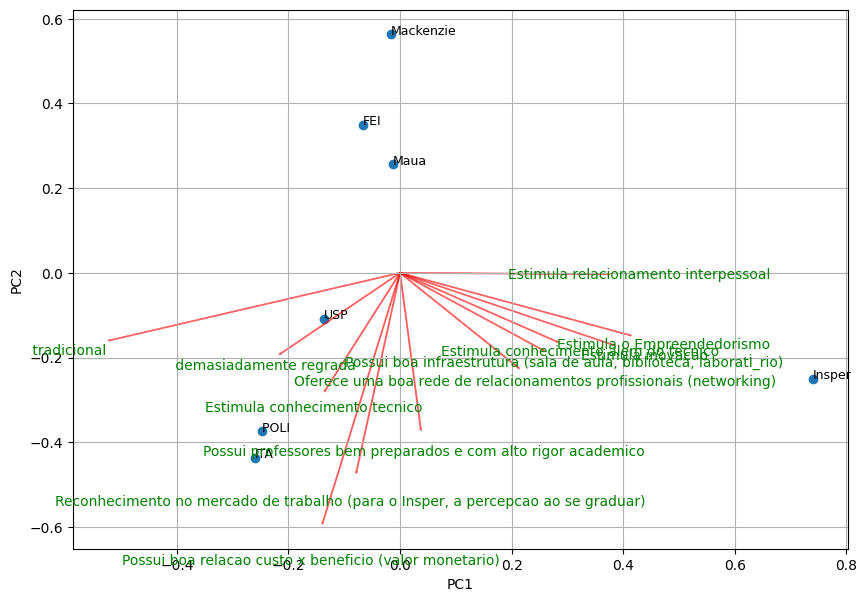

In [92]:
def biplot(score, coeff, labels, names):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley)
    for i, (x, y) in enumerate(zip(xs * scalex, ys * scaley)):
        plt.text(x, y, names[i], color='black', fontsize=9)  # Annotate each point with its index

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

features = df.columns
names = df.index

# Standardize the dataset
df_std = StandardScaler().fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
df_new = pca.fit_transform(df)

# Plot the biplot
plt.figure(figsize=(10, 7))
biplot(df_new, np.transpose(pca.components_[0:2, :]), labels=features, names=names)
plt.show()